Данная программа была разработана в рамках отраслевого чемпионата. Мне не удалось написать рабочий вариант программы, после обучения она не способна правильно распознать даже имя человека, однако я решил все равно оформить отчет о процессе разработки.

Данные для обучения я решил подготовить в виде csv-файла. Общий вид данных:
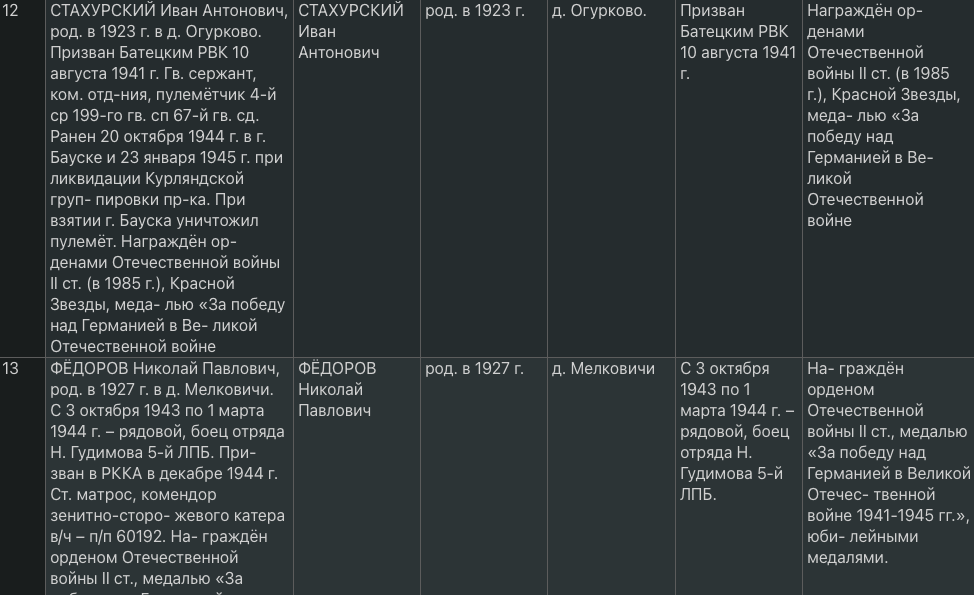

Для разработки данной нейронной сети я решил использовать сверточный тип нейронной сети. Для этого я использовал такой набор библиотек:

In [ ]:
#необходимые библиотеки
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

Google.colab - Эта библиотека предоставляет доступ к среде Google Colab (Colaboratory), она нужна для выбора файла csv;
pandas - Эта библиотека предоставляет мощные инструменты для анализа и манипулирования данными в форме таблиц (DataFrame);
Tensorflow - является основой для работы с нейросетью.

Я решил реализовать возможность выбора файла для того, чтобы избежать проблем с проверкой кода на других устройствах:

In [ ]:
# Загрузка данных
uploaded = files.upload()
uploaded_filename = list(uploaded.keys())[0]
data = pd.read_csv(uploaded_filename)

# Определение параметров
embedding_dim = 100
text_columns = ['Текст']
label_columns = ['Имя', 'Дата рождения', 'Место рождения', 'Как попали на войну', 'Награды']
num_words = 10000
sequence_length = 100

Подготавливаем данные для последующего обучения нейросети:

In [ ]:
# Разделение выборки
texts_train, texts_test, labels_train, labels_test = train_test_split(texts[0], encoded_labels, test_size=0.2, random_state=42)

# Токенизация текста
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(texts_train)
X_train = pad_sequences(tokenizer.texts_to_sequences(texts_train), maxlen=sequence_length)
X_test = pad_sequences(tokenizer.texts_to_sequences(texts_test), maxlen=sequence_length)

# Преобразование меток
num_classes = len(set(encoded_labels))
y_train = to_categorical(labels_train, num_classes)
y_test = to_categorical(labels_test, num_classes)

Первый блок кода выполняет разделение исходных данных на обучающую и тестовую выборки.
Второй блок кода создает словарь слов и индексов,
Третий блок преобразует данные в формат one-hot кодировки.

Создаем и обучаем модель:

In [ ]:
# Создание и компиляция модели
model = Sequential([
    Embedding(num_words, embedding_dim, input_length=sequence_length),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(num_classes, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
batch_size = 64
epochs = 100
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

После теста обученной модели я пришел к выводу, что нет смысла даже пытаться проверять её на pdf файле, она не способна к анализу даже обычного текста.

In [ ]:
text_to_analyze = "СТАЛЬНОВ Николай Дмитриевич, род. в 1908 г. в д. Большие Ясковицы. Работал инструктором военного уче- та спецчасти, зав. общим отделом Батецкого райисполкома. Призван в РККА в феврале 1939 г. Лейте- нант, зам. ком. роты по строевой части 45-й гв. сд 48-й оиптабр РГК Ленинградского фронта, ст. лей- тенант, нач. военно-хозяйствен- ного довольствия 2-й отд. бригады войск ПС 3-го Белорусского фрон- та. Уволен из ВС в марте 1960 г. Награждён орденами Отечест- венной войны II ст., Красной Звез- ды, медалями «За боевые заслуги», «За оборону Ленинграда», «За взя- тие Кёнигсберга», «За победу над Германией в Великой Отечествен- ной войне 1941-1945 гг.», «За побе- ду над Японией», юбилейными ме- далями. Прож. в д. Холохно. Умер 29 июля 1993 г."

Подготавливаем текст для анализа:

In [ ]:
#преобразовываем текст в последовательность цифр
text_sequence = tokenizer.texts_to_sequences([text_to_analyze])
text_sequence = pad_sequences(text_sequence, maxlen=sequence_length)

Производим анализ. Результат, как уже говорилось ранее, является неточным или вовсе отсутствует:

In [ ]:
# Получите предсказания для текста
predicted_probabilities = model.predict(text_sequence)

# Преобразование предсказанных вероятностей в индексы классов
predicted_class_index = predicted_probabilities.argmax(axis=-1)[0]

# Получите метку класса
predicted_label = label_encoder.classes_[predicted_class_index]

print(f"Предсказание: {predicted_label}")